# Blood Pressure Analysis

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Import dependencies
import numpy as np
import seaborn as sns
import os as os
import calendar

Load data

In [76]:
df = pd.read_csv('input/blood_pressure.csv')

In [77]:
df.dropna(inplace=True)
# Convert 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Drop rows with missing values
df.dropna(subset=['systolic pressure', 'diastolic pressure', 'bpm', 'mg'], inplace=True)

# Data exploration
print(df.describe())

                           Timestamp  systolic pressure  diastolic pressure  \
count                             91          91.000000           91.000000   
mean   2024-01-04 06:01:19.120879104         144.120879           85.747253   
min              2023-12-20 08:00:00          98.000000           62.000000   
25%              2023-12-27 17:00:00         125.000000           75.500000   
50%              2024-01-04 08:00:00         148.000000           90.000000   
75%              2024-01-11 17:00:00         161.500000           94.000000   
max              2024-01-19 08:00:00         177.000000          112.000000   
std                              NaN          19.722990           11.707162   

             bpm         mg  
count  91.000000  91.000000  
mean   71.692308   6.538462  
min    62.000000   5.000000  
25%    68.000000   5.000000  
50%    71.000000   5.000000  
75%    73.500000  10.000000  
max    85.000000  10.000000  
std     5.439960   2.320477  


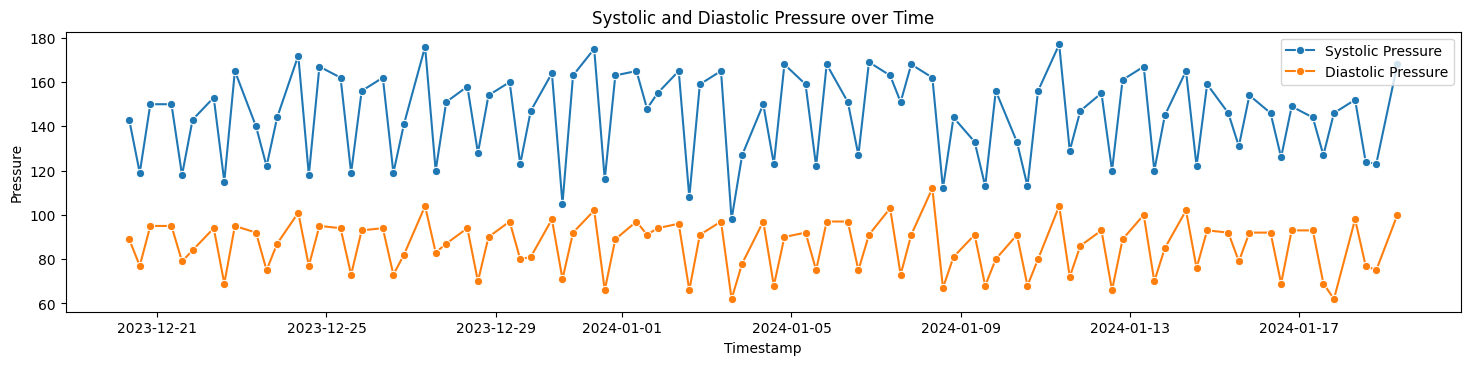

In [78]:
plt.figure(figsize=(18, 8))  # Wider figure
# Line plots for systolic and diastolic pressures
plt.subplot(2, 1, 1)
sns.lineplot(x='Timestamp', y='systolic pressure', data=df, marker='o', label='Systolic Pressure')
sns.lineplot(x='Timestamp', y='diastolic pressure', data=df, marker='o', label='Diastolic Pressure')
plt.xlabel('Timestamp')
plt.ylabel('Pressure')
plt.title('Systolic and Diastolic Pressure over Time')
plt.legend()

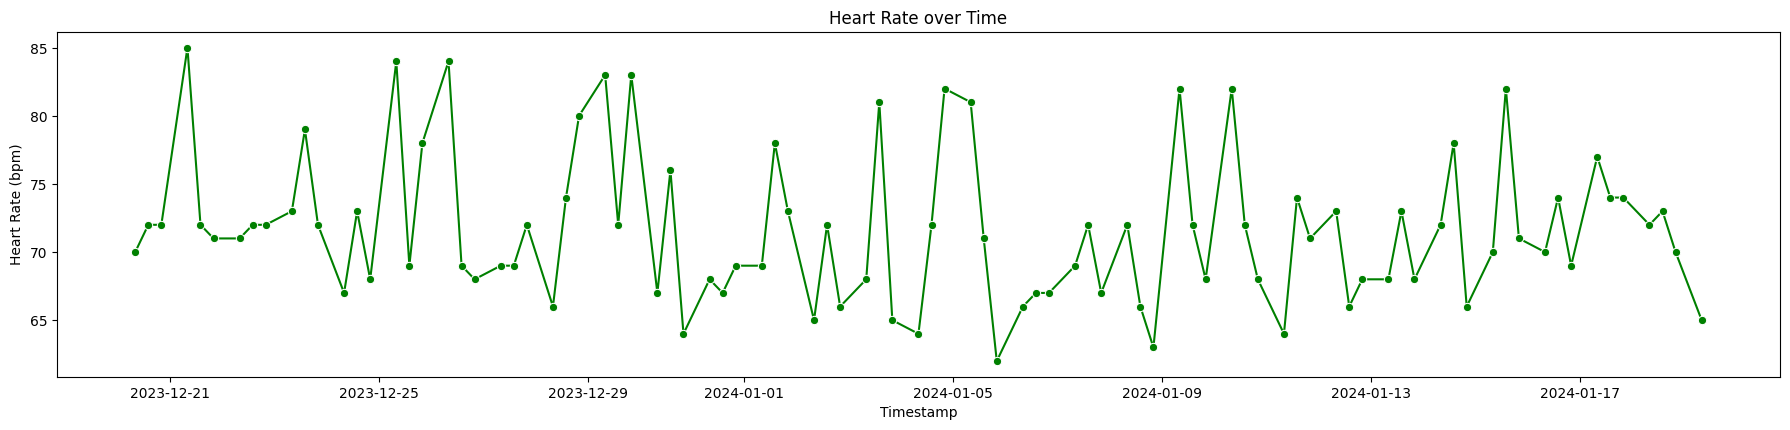

In [79]:
plt.figure(figsize=(18, 8))  # Wider figure
# Line plot for heart rate
plt.subplot(2, 1, 2)
sns.lineplot(x='Timestamp', y='bpm', data=df, marker='o', color='green')
plt.xlabel('Timestamp')
plt.ylabel('Heart Rate (bpm)')
plt.title('Heart Rate over Time')
plt.tight_layout()
plt.show()

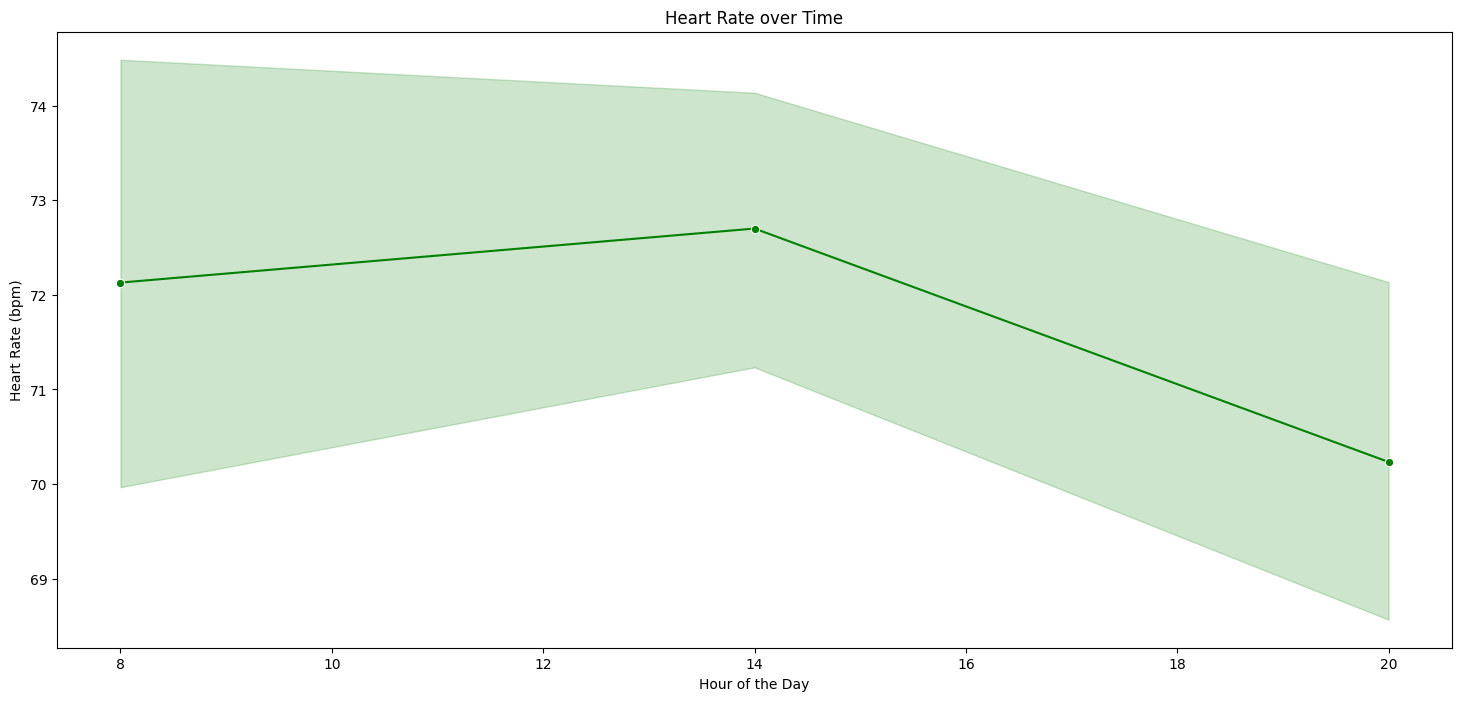

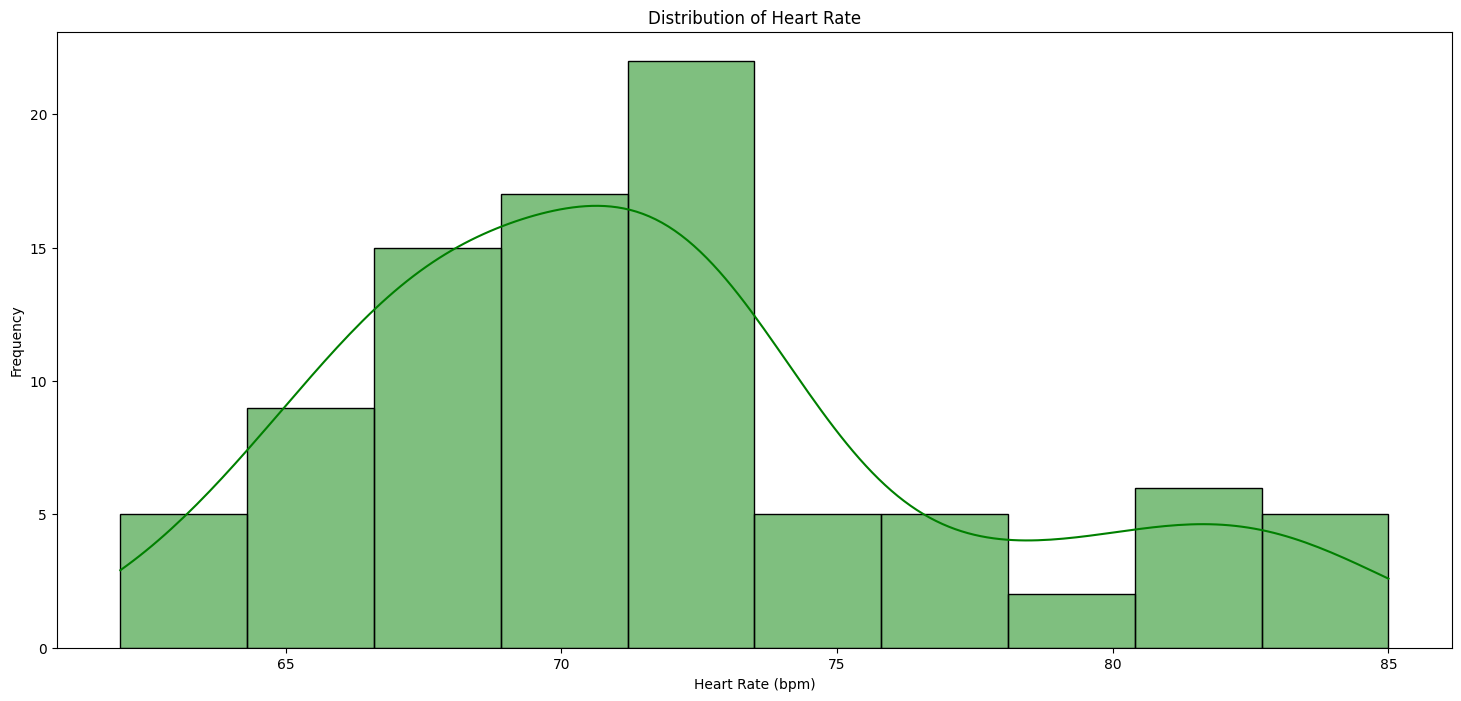

In [90]:
#Line plot for heart rate over time at different times of the day
df['hour'] = df['Timestamp'].dt.hour
plt.figure(figsize=(18, 8))
sns.lineplot(x='hour', y='bpm', data=df, marker='o', color='green')
plt.xlabel('Hour of the Day')
plt.ylabel('Heart Rate (bpm)')
plt.title('Heart Rate over Time')
plt.show()

#showing the distribution of the heart rate
plt.figure(figsize=(18, 8))
sns.histplot(df['bpm'], kde=True, color='green')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.title('Distribution of Heart Rate')
plt.show()



Overall:

In [80]:
#Calculate mean for each column except 'Timestamp' and 'mg'
mean = df.drop(columns=['Timestamp', 'mg']).mean()
print(f"Mean (Átlag):")
print(mean)



#Calculate standard deviation for each column except 'Timestamp' and 'mg'
std_dev = df.drop(columns=['Timestamp', 'mg']).std()
print(f"Standard deviation (Szórás):")
print(std_dev)

Mean (Átlag):
systolic pressure     144.120879
diastolic pressure     85.747253
bpm                    71.692308
dtype: float64
Standard deviation (Szórás):
systolic pressure     19.722990
diastolic pressure    11.707162
bpm                    5.439960
dtype: float64


## 5 mg dose

In [81]:
#Calculate mean for each column except 'Timestamp' and 'mg' for where 'mg' is 5
mean = df[df['mg'] == 5].drop(columns=['Timestamp', 'mg']).mean()
print(f"Mean (Átlag) where 'mg' is 5:")
print(mean)

# Calculate standard deviation for each column except 'Timestamp' and 'mg' for where 'mg' is 5
std_dev = df[df['mg'] == 5].drop(columns=['Timestamp', 'mg']).std()
print(f"Standard deviation (Szórás) where 'mg' is 5:")
print(std_dev)

Mean (Átlag) where 'mg' is 5:
systolic pressure     144.603175
diastolic pressure     86.301587
bpm                    71.746032
dtype: float64
Standard deviation (Szórás) where 'mg' is 5:
systolic pressure     20.789684
diastolic pressure    11.474565
bpm                    5.841918
dtype: float64


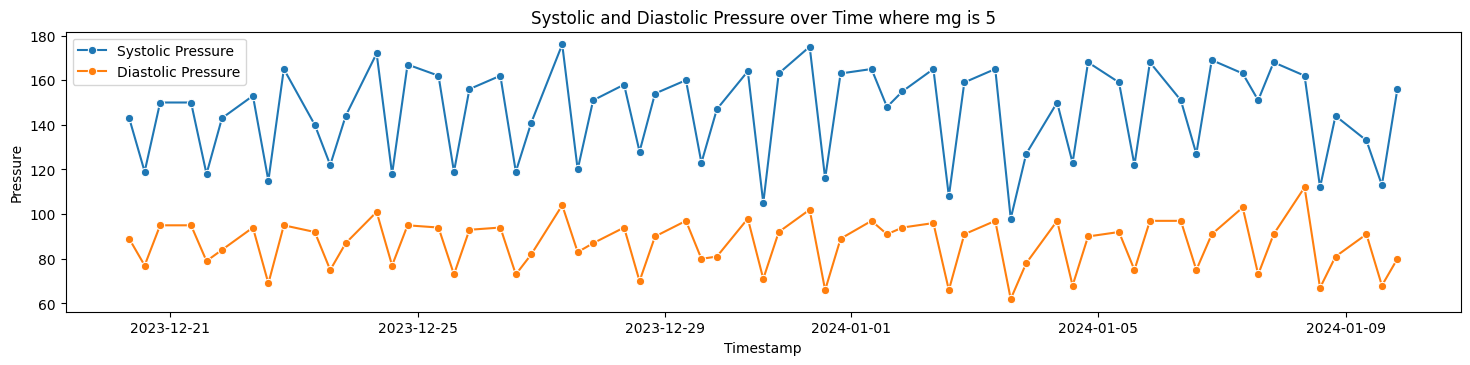

In [82]:
#visualize the data where 'mg' is 5
plt.figure(figsize=(18, 8))  # Wider figure
# Line plots for systolic and diastolic pressures
plt.subplot(2, 1, 1)
sns.lineplot(x='Timestamp', y='systolic pressure', data=df[df['mg'] == 5], marker='o', label='Systolic Pressure')
sns.lineplot(x='Timestamp', y='diastolic pressure', data=df[df['mg'] == 5], marker='o', label='Diastolic Pressure')
plt.xlabel('Timestamp')
plt.ylabel('Pressure')
plt.title('Systolic and Diastolic Pressure over Time where mg is 5')
plt.legend()
plt.show()

## 10 mg dose

In [83]:
#Calculate mean for each column except 'Timestamp' and 'mg' for where 'mg' is 10
mean = df[df['mg'] == 10].drop(columns=['Timestamp', 'mg']).mean()
print(f"Mean (Átlag) where 'mg' is 10:")
print(mean)

# Calculate standard deviation for each column except 'Timestamp' and 'mg' for where 'mg' is 5
std_dev = df[df['mg'] == 10].drop(columns=['Timestamp', 'mg']).std()
print(f"Standard deviation (Szórás) where 'mg' is 10:")
print(std_dev)


Mean (Átlag) where 'mg' is 10:
systolic pressure     143.035714
diastolic pressure     84.500000
bpm                    71.571429
dtype: float64
Standard deviation (Szórás) where 'mg' is 10:
systolic pressure     17.389827
diastolic pressure    12.336336
bpm                    4.500441
dtype: float64


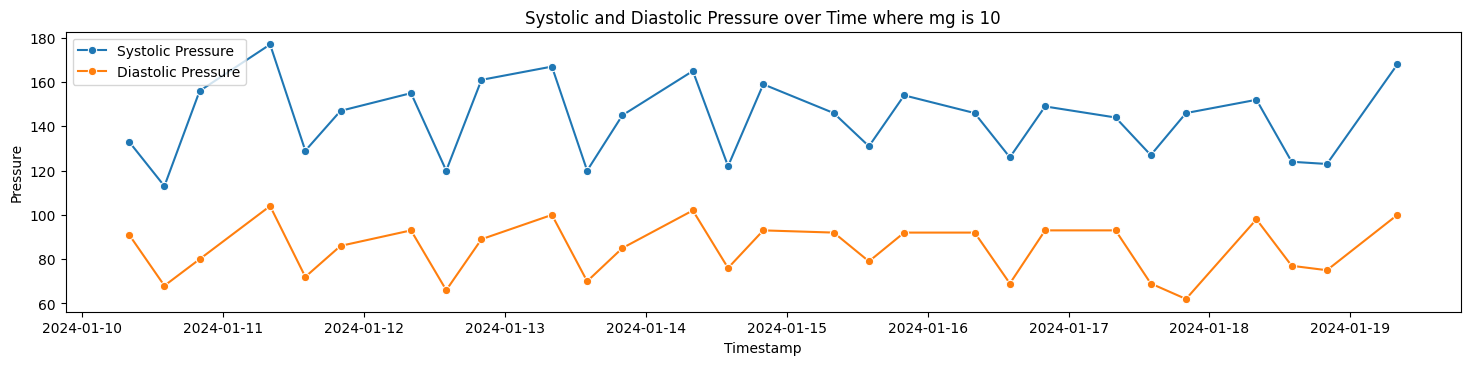

In [84]:
#visualize the data where 'mg' is 10
plt.figure(figsize=(18, 8))  # Wider figure
# Line plots for systolic and diastolic pressures
plt.subplot(2, 1, 1)
sns.lineplot(x='Timestamp', y='systolic pressure', data=df[df['mg'] == 10], marker='o', label='Systolic Pressure')
sns.lineplot(x='Timestamp', y='diastolic pressure', data=df[df['mg'] == 10], marker='o', label='Diastolic Pressure')
plt.xlabel('Timestamp')
plt.ylabel('Pressure')
plt.title('Systolic and Diastolic Pressure over Time where mg is 10')
plt.legend()
plt.show()

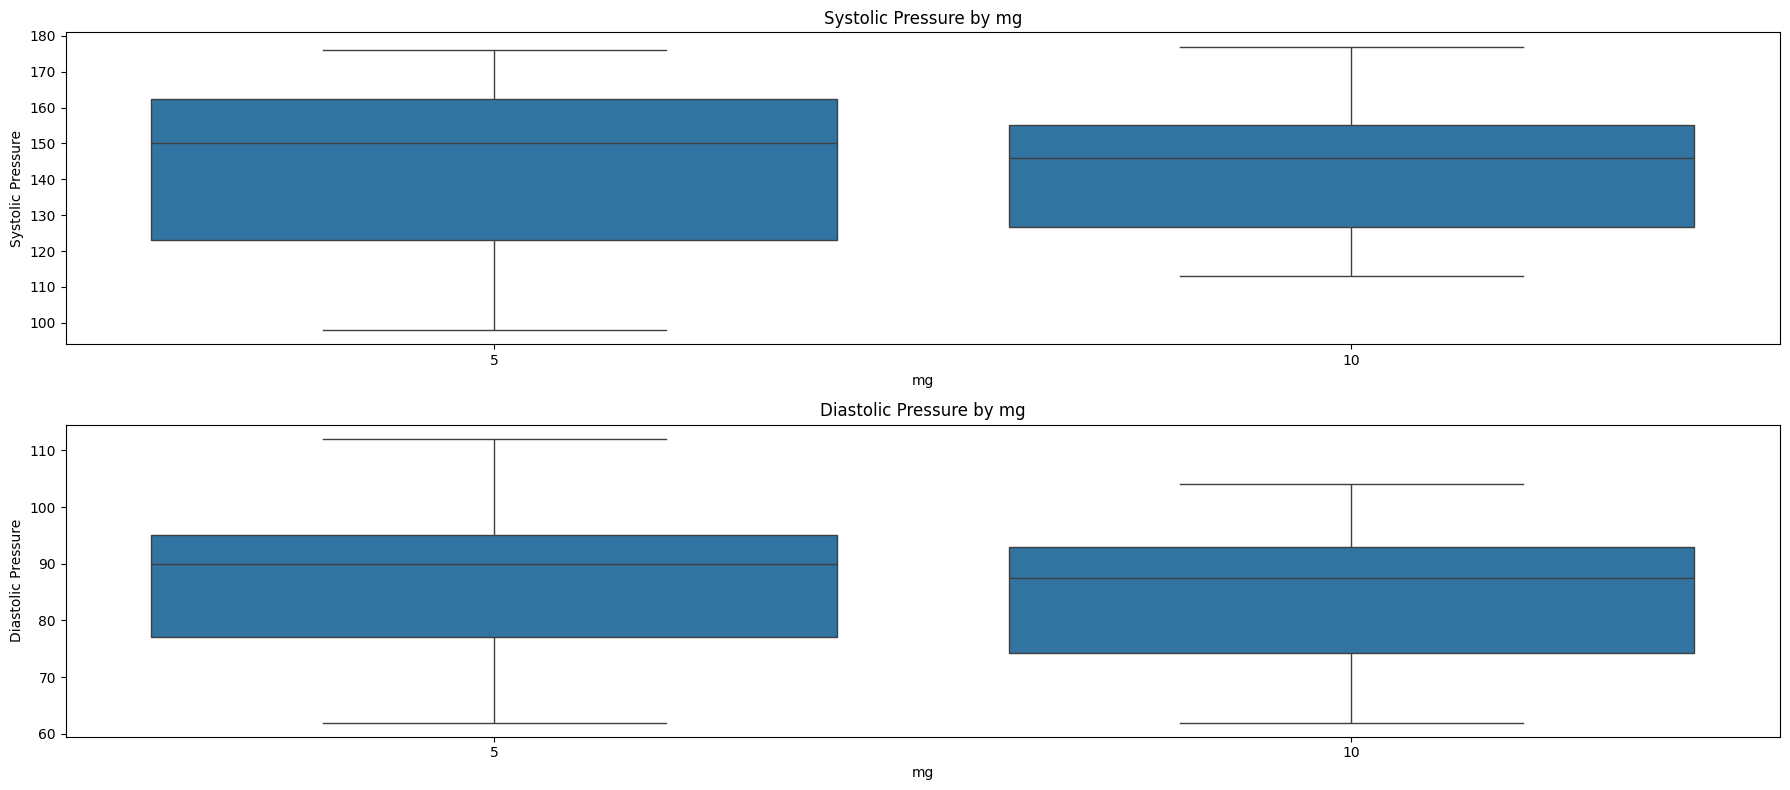

In [85]:
#show the data in a boxplot
plt.figure(figsize=(18, 8))
plt.subplot(2, 1, 1)
sns.boxplot(x='mg', y='systolic pressure', data=df)
plt.xlabel('mg')
plt.ylabel('Systolic Pressure')
plt.title('Systolic Pressure by mg')
plt.subplot(2, 1, 2)
sns.boxplot(x='mg', y='diastolic pressure', data=df)
plt.xlabel('mg')
plt.ylabel('Diastolic Pressure')
plt.title('Diastolic Pressure by mg')
plt.tight_layout()
plt.show()


In [88]:
""" #show how change of mg affects the systolic pressure
plt.figure(figsize=(18, 8))
sns.lineplot(x='mg', y='systolic pressure', data=df, marker='o')
plt.xlabel('mg')
plt.ylabel('Systolic Pressure')
plt.title('Systolic Pressure by mg')
plt.show()

#show how change of mg affects the diastolic pressure
plt.figure(figsize=(18, 8))
sns.lineplot(x='mg', y='diastolic pressure', data=df, marker='o')
plt.xlabel('mg')
plt.ylabel('Diastolic Pressure')
plt.title('Diastolic Pressure by mg')
plt.show() """

" #show how change of mg affects the systolic pressure\nplt.figure(figsize=(18, 8))\nsns.lineplot(x='mg', y='systolic pressure', data=df, marker='o')\nplt.xlabel('mg')\nplt.ylabel('Systolic Pressure')\nplt.title('Systolic Pressure by mg')\nplt.show()\n\n#show how change of mg affects the diastolic pressure\nplt.figure(figsize=(18, 8))\nsns.lineplot(x='mg', y='diastolic pressure', data=df, marker='o')\nplt.xlabel('mg')\nplt.ylabel('Diastolic Pressure')\nplt.title('Diastolic Pressure by mg')\nplt.show() "

In [86]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
print(f"Correlation matrix:")
print(correlation_matrix)

Correlation matrix:
                    Timestamp  systolic pressure  diastolic pressure  \
Timestamp            1.000000          -0.000070           -0.083964   
systolic pressure   -0.000070           1.000000            0.856252   
diastolic pressure  -0.083964           0.856252            1.000000   
bpm                 -0.127957          -0.188438           -0.112369   
mg                   0.799637          -0.036883           -0.071419   

                         bpm        mg  
Timestamp          -0.127957  0.799637  
systolic pressure  -0.188438 -0.036883  
diastolic pressure -0.112369 -0.071419  
bpm                 1.000000 -0.014896  
mg                 -0.014896  1.000000  
